# Iris 数据集二分类

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
df['label'] = iris.target

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
df.columns = ['sepal length', 'sepal width', 'petal length','petal width', 'label']
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
# count
df.label.value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

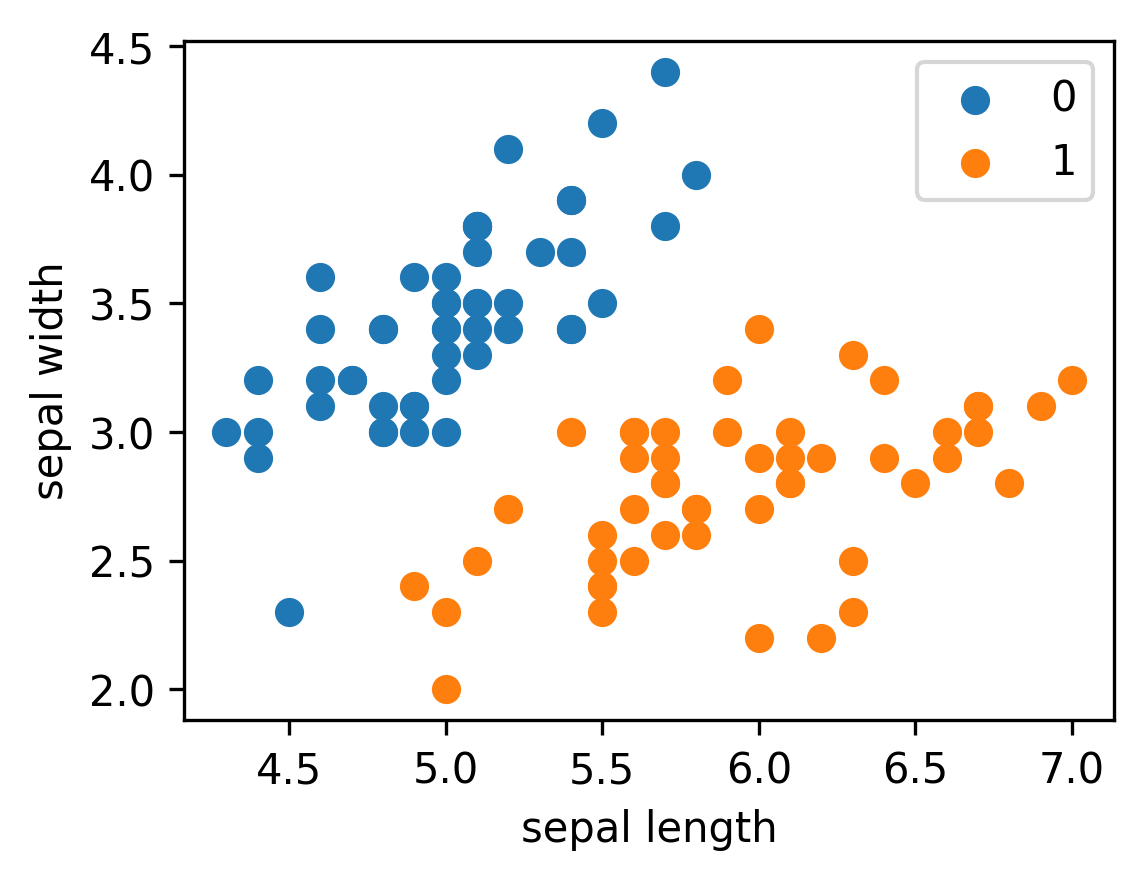

In [8]:
plt.figure(figsize=(4, 3), dpi = 300)
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label = '0')
plt.scatter(df[50:100]['sepal length'], df[50: 100]['sepal width'], label = '1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

In [9]:
# 把df数据放在array中
data = np.array(df.iloc[: 100, [0, 1, -1]]) # 取 sepal length， sepal width， label列
X, y = data[:, :-1], data[:, -1]
y = np.array([1 if i == 1 else -1 for i in y]) # label 标记为-1 和 1

In [10]:
print(X.shape, y.shape)

(100, 2) (100,)


# 构建 Perceptron

In [11]:
# 数据线性可分
class MyPerceptron:
    def __init__(self):
        self.w =  None
        self.b = 0
        self.l_rate = 0.1
    
    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y
        
    # random gradient descent
    def fit(self, X_train, y_train):
        
        # initiallize weight
        self.w = np.ones(X_train.shape[1], dtype = np.float32)
        
        is_wrong = False       # flag
        while not is_wrong:
            wrong_count = 0
            
            # 遍历样本
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                
                print(self.w)
                
                # conditon
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y, X)
                    self.b = self.b + self.l_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return "Over!"

In [12]:
model = MyPerceptron()
model.fit(X, y)

[1. 1.]
[0.49 0.65]
[-5.55111512e-17  3.50000000e-01]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[-0.47  0.03]
[0.23 0.35]
[0.23 0.35]
[0.23 0.35]
[0.23 0.35]
[0.23 0.35]
[0.23 0.35]
[0.23 0.35]
[0.23 0.35]
[0.23 0.35]
[0.23 0.35]
[0.23 0.35]
[0.23 0.35]
[0.23 0.35]
[0.23 0.35]
[0.23 0.35]
[0.23 0.35]
[0.23 0.35]
[0.23 0.35]
[0.23 0.35]
[0.23 0.35]
[0.23 0.35]
[0.23 0.35]
[0.23 0.35

[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 4.8  -7.98]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36 -7.68]
[ 5.36

[ 5.84 -8.72]
[ 5.84 -8.72]
[ 5.84 -8.72]
[ 5.84 -8.72]
[ 5.84 -8.72]
[ 5.84 -8.72]
[ 5.84 -8.72]
[ 5.84 -8.72]
[ 5.84 -8.72]
[ 5.84 -8.72]
[ 5.84 -8.72]
[ 5.84 -8.72]
[ 5.84 -8.72]
[ 5.84 -8.72]
[ 5.84 -8.72]
[ 5.84 -8.72]
[ 5.84 -8.72]
[ 5.84 -8.72]
[ 5.84 -8.72]
[ 5.84 -8.72]
[ 5.84 -8.72]
[ 5.84 -8.72]
[ 5.84 -8.72]
[ 5.84 -8.72]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 6.38 -8.42]
[ 5.88 -8.72]
[ 5.88 -8.72]
[ 5.88 -8.72]
[ 5.88 -8.72]
[ 5.88 -8.72]
[ 5.88 -8.72]
[ 5.88

[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.62 -8.94]
[ 6.17 -9.17]
[ 6.17 -9.17]
[ 6.17 -9.17]
[ 6.17 -9.17]
[ 6.17 -9.17]
[ 6.17 -9.17]
[ 6.17 -9.17]
[ 6.17 -9.17]
[ 6.17 -9.17]
[ 6.17 -9.17]
[ 6.17 -9.17]
[ 6.17 -9.17]
[ 6.17 -9.17]
[ 6.17 -9.17]
[ 6.17 -9.17]
[ 6.17 -9.17]
[ 6.17 -9.17]
[ 6.17 -9.17]
[ 6.69 -8.9 ]
[ 6.69 -8.9 ]
[ 6.69 -8.9 ]
[ 6.69 -8.9 ]
[ 6.69 -8.9 ]
[ 6.69 -8.9 ]
[ 6.69 -8.9 ]
[ 6.69 -8.9 ]
[ 6.69 -8.9 ]
[ 6.69 -8.9 ]
[ 6.69 -8.9 ]
[ 6.69 -8.9 ]
[ 6.69 -8.9 ]
[ 6.69 -8.9 ]
[ 6.69 -8.9 ]
[ 6.69 -8.9 ]
[ 6.69 -8.9 ]
[ 6.69 -8.9 ]
[ 6.69 -8.9 ]
[ 6.69 -8.9 ]
[ 6.69 -8.9 ]
[ 6.69 -8.9 ]
[ 6.69

'Over!'

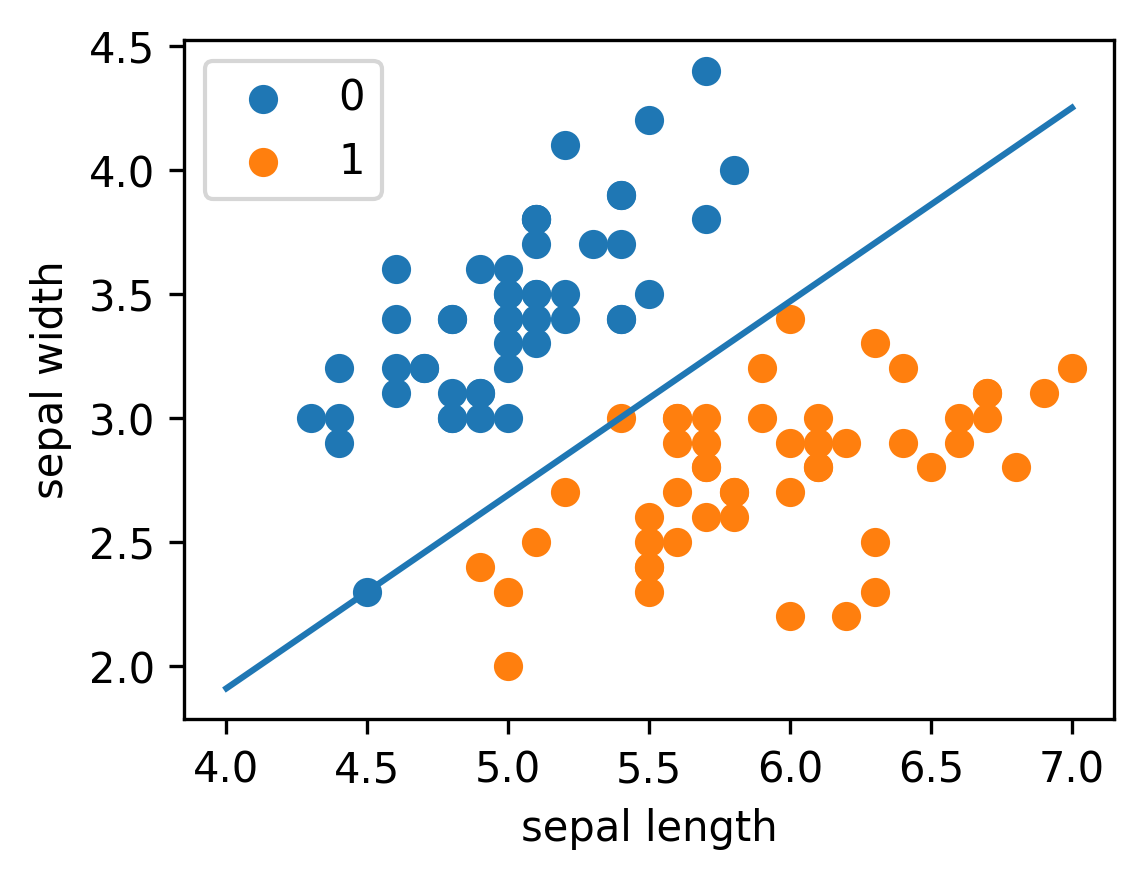

In [13]:
plt.figure(figsize=(4, 3), dpi = 300)
x_new = np.linspace(4, 7, 10)
y_pre = - (model.w[0] * x_new + model.b) / model.w[1]
plt.plot(x_new, y_pre)

plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label = '0')
plt.scatter(df[50:100]['sepal length'], df[50: 100]['sepal width'], label = '1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

# scikit-learn 编程

In [14]:
import sklearn
from sklearn.linear_model import Perceptron
sklearn.__version__

'1.1.1'

In [15]:
clf = Perceptron(fit_intercept= True, max_iter= 1000, shuffle = True)
clf.fit(X, y)

Perceptron()

In [16]:
print(clf.coef_)

[[ 23.2 -38.7]]


In [17]:
print(clf.intercept_)

[-5.]


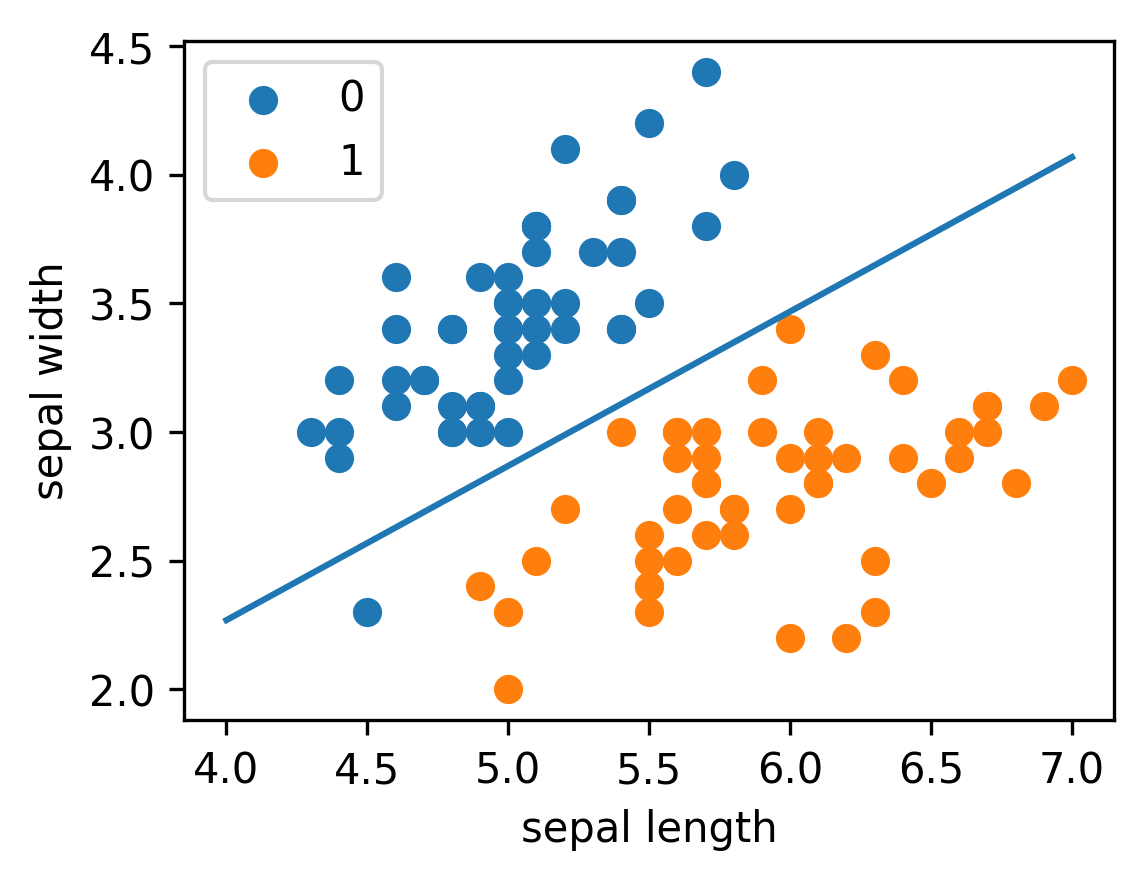

In [18]:
plt.figure(figsize=(4, 3), dpi = 300)
x_new = np.arange(4, 8)
y_pre = - (clf.coef_[0][0] * x_new +clf.intercept_) / clf.coef_[0][1]
plt.plot(x_new, y_pre)

plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label = '0')
plt.scatter(df[50:100]['sepal length'], df[50: 100]['sepal width'], label = '1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

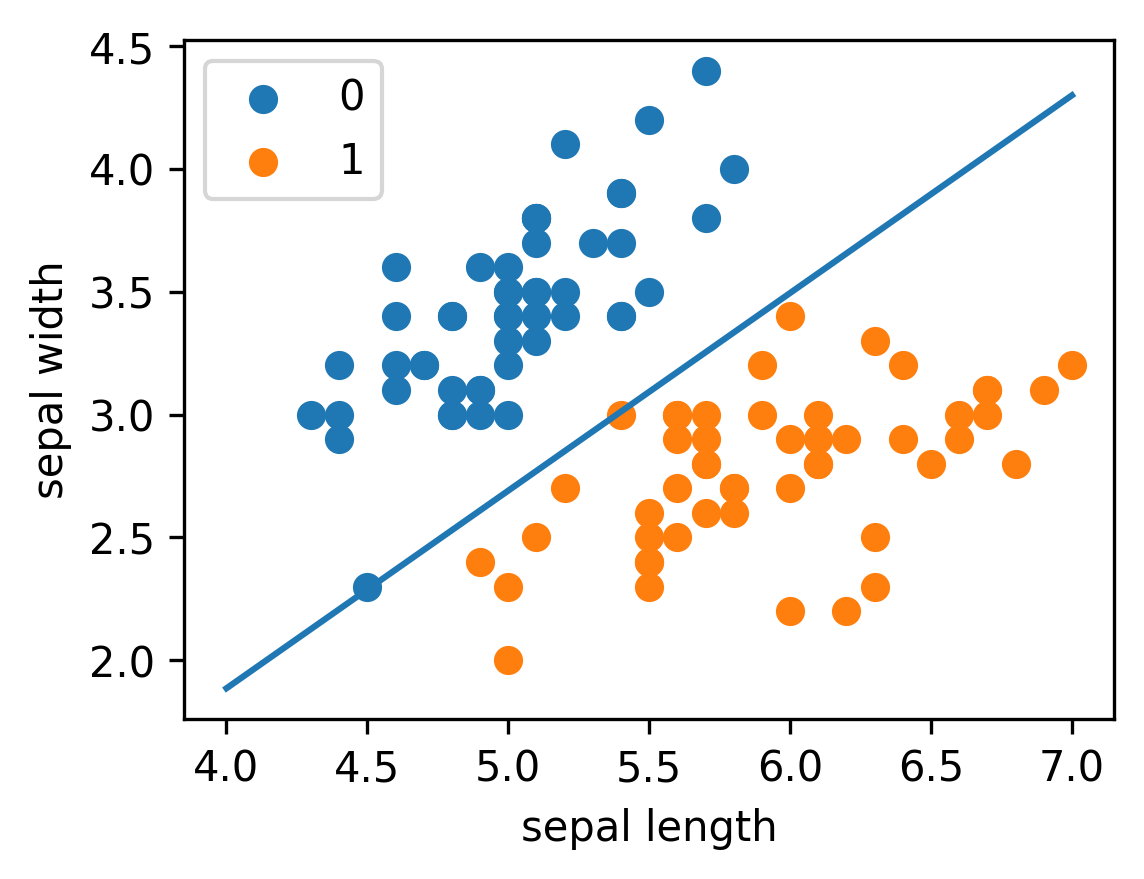

In [19]:
# 上述结果存在一个错分类，原因是sklearn中perceptron中有一个参数tol参数

clf = Perceptron(fit_intercept= True, max_iter= 1000, tol = None, shuffle = True)
clf.fit(X, y)

plt.figure(figsize=(4, 3), dpi = 300)
x_new = np.arange(4, 8)
y_pre = - (clf.coef_[0][0] * x_new +clf.intercept_) / clf.coef_[0][1]
plt.plot(x_new, y_pre)

plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label = '0')
plt.scatter(df[50:100]['sepal length'], df[50: 100]['sepal width'], label = '1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()